In [82]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader.yahoo.daily import YahooDailyReader
import datetime

In [83]:
date_st = datetime.datetime(2015, 1, 1)
date_fn = datetime.datetime(2020,1,1)

In [84]:
df1 = YahooDailyReader('MSFT', date_st, date_fn).read().reset_index()
df1.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-12-31,47.439999,46.450001,46.730000,46.450001,21552500.0,41.587284
1,2015-01-02,47.419998,46.540001,46.660000,46.759998,27913900.0,41.864841
2,2015-01-05,46.730000,46.250000,46.369999,46.330002,39673900.0,41.479866


In [85]:
ts = df1['Close'].values

In [86]:
ts

array([ 46.45000076,  46.75999832,  46.33000183, ..., 158.96000671,
       157.58999634, 157.69999695])

In [87]:
ts.shape

(1259,)

### 問題設定
- 分類問題
- 株価について、分類したい。\
- ある日から見て、次の日の株価があがるか下がるかを予測

### 教師データの作成
- 演習

    - ある日の数値を入力データx
    - 明日の株価（終値）があがるか下がるかを予測したいので、上がる場合は「１」、ｓがる場合は「０」をラベリング

In [88]:
ts[0]

46.45000076293945

In [89]:
ts[0]<ts[1]

True

In [90]:
x, t, = [], [],
for i in range(len(ts)-1):
    x.append(ts[i])
    if ts[i-1]<ts[i]:
        t.append(1)
    else:
        t.append(0)


In [91]:
t = np.array(t)
x = np.array(x).reshape(len(x), 1)

In [92]:
x.shape

(1258, 1)

### 訓練データと検証データへの分割
 - 訓練データ70%
 - train_size=1,shuffle = False : ランダムに選ばないようにする. train test splitの時
### モデルの構築・学習

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
# 訓練データと検証データに切り分け
train_x, val_x, train_t, val_t = train_test_split(x, t, train_size=0.7, random_state=0, shuffle = False)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [95]:
train_x.shape, val_x.shape, train_t.shape, val_t.shape

((880, 1), (378, 1), (880,), (378,))

In [96]:
# シードの固定
import os
import random

def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定

In [97]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

In [98]:
from tensorflow.keras import models,layers

#シードの固定
reset_seed(0)

model = models.Sequential()

model.add(layers.Dense(10, input_shape=(1,), activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

optimizer = keras.optimizers.SGD(lr=0.01)

model.compile(loss='mean_squared_error', optimizer=optimizer) #ここでオプティマイザと損失関数

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [99]:
history = model.fit(train_x, train_t,
          batch_size=100,
          epochs=20,
          verbose=1,
          validation_data=(val_x, val_t),shuffle=False)

Train on 880 samples, validate on 378 samples
Epoch 1/20
880/880 [==============================] - 0s 518us/sample - loss: 8.5695 - accuracy: 0.4943 - val_loss: 10.1153 - val_accuracy: 0.5714
Epoch 2/20
880/880 [==============================] - 0s 34us/sample - loss: 1.2867 - accuracy: 0.4920 - val_loss: 1.2377 - val_accuracy: 0.5714
Epoch 3/20
880/880 [==============================] - 0s 32us/sample - loss: 0.7155 - accuracy: 0.5034 - val_loss: 0.8645 - val_accuracy: 0.5714
Epoch 4/20
880/880 [==============================] - 0s 32us/sample - loss: 0.7021 - accuracy: 0.5011 - val_loss: 0.7391 - val_accuracy: 0.5714
Epoch 5/20
880/880 [==============================] - 0s 32us/sample - loss: 0.6973 - accuracy: 0.5125 - val_loss: 0.7017 - val_accuracy: 0.5714
Epoch 6/20
880/880 [==============================] - 0s 33us/sample - loss: 0.6954 - accuracy: 0.5125 - val_loss: 0.6876 - val_accuracy: 0.5714
Epoch 7/20
880/880 [==============================] - 0s 32us/sample - loss: 0.694

In [100]:
results = pd.DataFrame(history.history)

In [101]:
results

,loss,accuracy,val_loss,val_accuracy
0,8.569455,0.494318,10.115261,0.571429
1,1.286716,0.492045,1.237701,0.571429
2,0.715520,0.503409,0.864524,0.571429
3,0.702097,0.501136,0.739087,0.571429
4,0.697309,0.512500,0.701724,0.571429
5,0.695421,0.512500,0.687587,0.571429
6,0.694398,0.512500,0.682553,0.571429
7,0.693765,0.512500,0.681802,0.571429
8,0.693345,0.512500,0.683286,0.571429
9,0.693057,0.512500,0.685996,0.571429


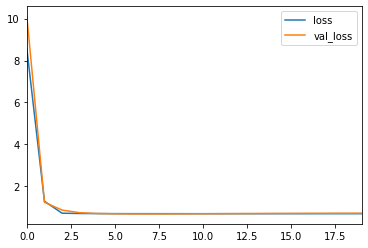

In [102]:
graph = results[['loss', 'val_loss']].plot()

## LSTMの実装

In [111]:
#input_shape=(1,1)知雨風に二次元の形になる。

x = np.array(x).reshape(len(x), 1, 1)

In [112]:
x.shape

(1258, 1, 1)

In [113]:
test_x, val_x, train_t, val_t = train_test_split(x, t, test_size=0.3, shuffle=False)

In [115]:
import os
import random


def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定

In [116]:
#シードの固定
reset_seed(0)
#モデルのインスタンス化
model = models.Sequential()

#モデルの構築
model.add(layers.LSTM(10, activation='relu', input_shape=(1,1)))
model.add(layers.Dense(2, activation='sigmoid'))

In [117]:
# 最適化手法設定
optimizer = keras.optimizers.SGD(lr = 0.01)

In [118]:
# モデルのコンパイル
model.compile(loss = 'sparse_categorical_crossentropy',
            optimizer = optimizer,
            metrics = ['accuracy'])

In [120]:
history = model.fit(train_x, train_t,
          batch_size=100,
          epochs=20,
          verbose=1,
          validation_data=(val_x, val_t),
          shuffle=False)

ValueError: Error when checking input: expected lstm_2_input to have 3 dimensions, but got array with shape (880, 1)